# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

Question: How does word frequency change between two types of posts from the same author?

In [71]:
import requests
from bs4 import BeautifulSoup
import re
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams.update({'font.size': 16})

https://thesynack.com/posts/setup-storage-device/
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'n

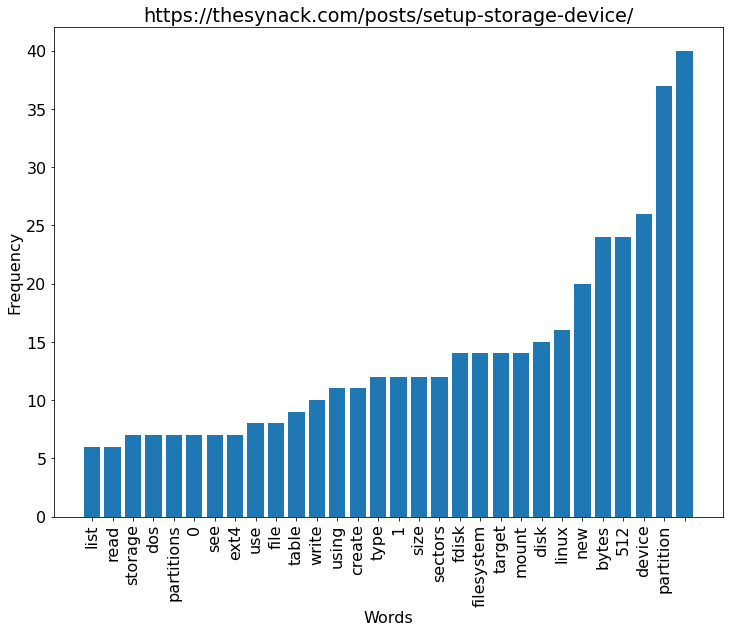

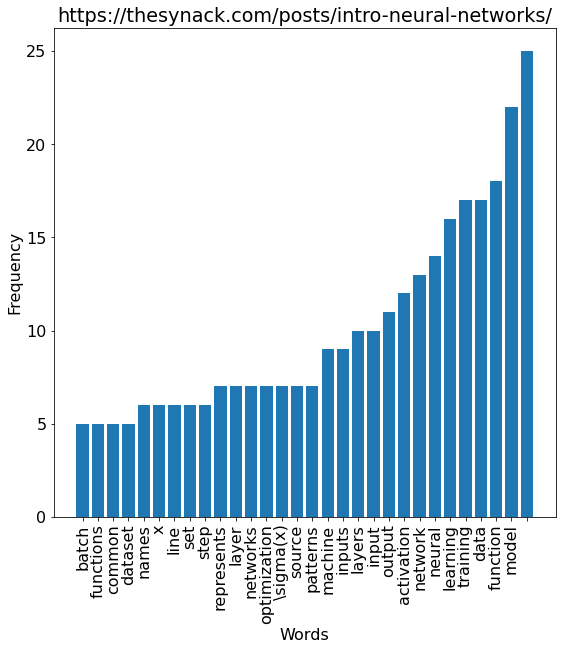

<Figure size 648x648 with 0 Axes>

In [77]:
def plotWordFrequency(url, index):
    print(url)
    r = requests.get(url)
    soup = BeautifulSoup(r.text.lower(), 'html.parser')
    text = soup.get_text()
    words = re.split('\s+',text)
    
    for i in range(len(words)):
        words[i] = re.sub('[,"\.\'&\|:@>*;/=\$\# ]', "", words[i])
                
    # calculate word frequency
    wordFreqs = []
    uniqueWords = []
    uniqueWords = list(set(words))
    stop_words = nltk.corpus.stopwords.words('english') + ['', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    print(stop_words)
    for word in uniqueWords:
        if word in stop_words: 
            continue
        if (word == ''):
            print("It's empty")
        wordFreq = words.count(word)
        wordFreqs.append([word,wordFreq])
        
    wordFreqs.sort(key = lambda x: x[1])
    w, f = zip(*wordFreqs)
        
    # create plot
    #plt.subplot(2, 1, index)
    plt.title(url)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.bar(w[-30:], f[-30:])
    plt.xticks(rotation=90)
    plt.figure(figsize=(9,9))
    
    print(w[-1:])

plotWordFrequency('https://thesynack.com/posts/setup-storage-device/', 1)
plotWordFrequency('https://thesynack.com/posts/intro-neural-networks/', 2)